<a href="https://colab.research.google.com/github/Ikenna1011/AAI-510/blob/main/AAI_510_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Customer Engagement Strategies for a Banking Institution

## Problem Statement:

This project revolves around conducting credit analysis using various machine learning algorithms, including KNN (K-Nearest Neighbors), DTree (Decision Tree), RF (Random Forest), and Bagging. The objective is to leverage the Bank Marketing dataset to predict creditworthiness and provide insights into the factors influencing credit approval decisions.

### Justification for this Approach:

  Utilizing multiple machine learning algorithms can provide a comprehensive analysis of the Bank Marketing dataset, enabling comparison of their performance and evaluating the most accurate and reliable credit predictions. Each algorithm has its strengths and weaknesses, enhancing prediction accuracy. Employing different algorithms assesses model robustness and generalization, while decision tree-based algorithms offer interpretability and explainability. This approach is relevant in the banking and financial sectors, enabling the identification of suitable techniques for creditworthiness prediction and enhancing real-world credit assessment processes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! ls

 AAI_510_FinalProject.gslides
 AAI_510_FinalProject.ipynb
'AAI-510 Final Team Project Status Update Form.docx'
 bank-additional-full.csv
 bank-additional-names.txt
'Copy of AAI_510_FinalProject.ipynb'
'Final Assignment 7.1: Pitching Your ML Algorithm.gdoc'
 optimal_model.pickle


In [ ]:
%cd gdrive/MyDrive/AAI-510/Project

[Errno 2] No such file or directory: 'gdrive/MyDrive/AAI-510/Project'
/content/gdrive/MyDrive/AAI-510/Project


## Exploratory Data Analysis (EDA)

A graphical and non-graphical representation of relationships between the response variable and predictor variables.

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn import model_selection, metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, r2_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("bank-additional-full.csv", sep = ';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Get the shape of the data
df.shape


(41188, 21)

## Data understanding

The "Bank Marketing" dataset, obtained from the UCI Machine Learning Repository, contains 20 variables and a dependent variable. The dataset consists of 41,188 instances, representing customers' demographics, banking habits, and campaign outcomes. The exploratory data analysis (EDA) aims to predict the relationship between the response variable and predictor variables using a machine learning model.

In [ ]:
# Explore the dataset
print(df.head(10))  # View the first few rows of the dataset
print(df.info())  # Get an overview of the dataset


   age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   m

The data consists of a mixture of negative and non-negative values. It also has numerical and categorical variables, which makes it challenging to balance the classes. One possible solution is to use techniques such as oversampling or undersampling to create a more balanced dataset. Another approach is to use algorithms that are robust to class imbalance, such as decision trees or support vector machines with appropriate class weights.

In [ ]:
# Check for categorical variables
for column in df.columns:
    print()
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f'Column name: {column}, Unique values: {unique_values}')




Column name: job, Unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Column name: marital, Unique values: ['married' 'single' 'divorced' 'unknown']

Column name: education, Unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Column name: default, Unique values: ['no' 'unknown' 'yes']

Column name: housing, Unique values: ['no' 'yes' 'unknown']

Column name: loan, Unique values: ['no' 'yes' 'unknown']

Column name: contact, Unique values: ['telephone' 'cellular']

Column name: month, Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Column name: day_of_week, Unique values: ['mon' 'tue' 'wed' 'thu' 'fri']





Column name: poutcome, Unique values: ['nonexistent' 'failure' 'success']






Column name: y, Unique values: ['no' 'yes']


In [ ]:
# Get descriptive statistics of numerical columns
print(df.describe())


               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

From the described statistics, it doesn't appear as if our data is normally distributed. Data imbalance may affect machine learning algorithms; oversampling or undersampling can help.

In [ ]:
# Check the distribution of the target variable
print(df["y"].value_counts())


no     36548
yes     4640
Name: y, dtype: int64


The imbalance between the two response variable classes is now clear. The "no" class is larger than the "yes."

### Perform data visualization

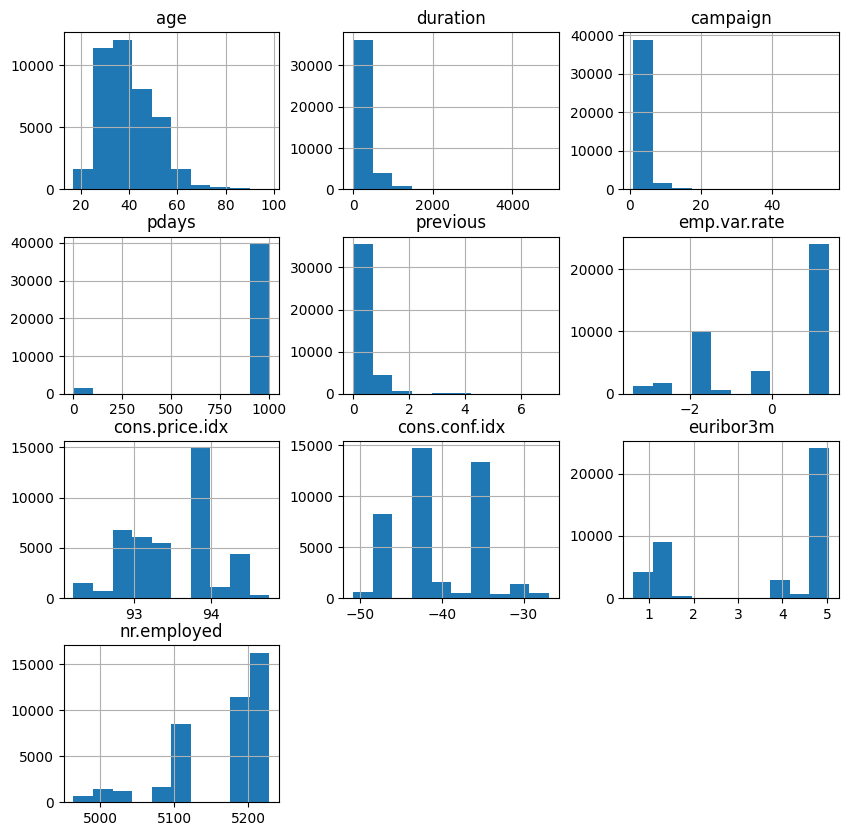

In [ ]:
# Plot a histogram of the numerical features
df.hist(figsize=(10, 10))
plt.show()


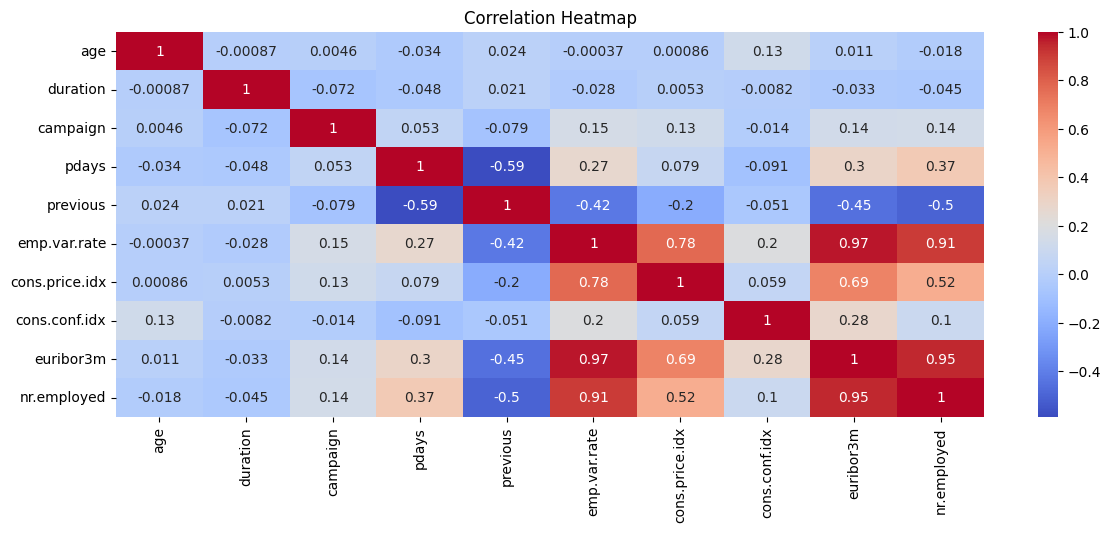

In [ ]:
# Visualize the correlation between numerical features using a heatmap
plt.figure(figsize = (14, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

The correlation matrix shows a few features that are strongly correlated and those that are not. Although the graph is hard to read, For interpretability, I will extract and print the correlation values between the variables.

To enhance our understanding, we shall illustrate the data correlation for a correlation coefficient of at least 0.75. The values above this threshold reflect a strong correlation.

In [ ]:
# Calculate the correlation matrix and select correlations greater than or equal to 0.75
correlation = df.corr()
strong_correlation = correlation[correlation >= 0.75]
strong_correlation


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


The feature sets that are highly correlated are identical to those displayed in the previous code, as can be seen. You'll see that some values are missing and are displayed as "NaN." We'll take care of this much later.

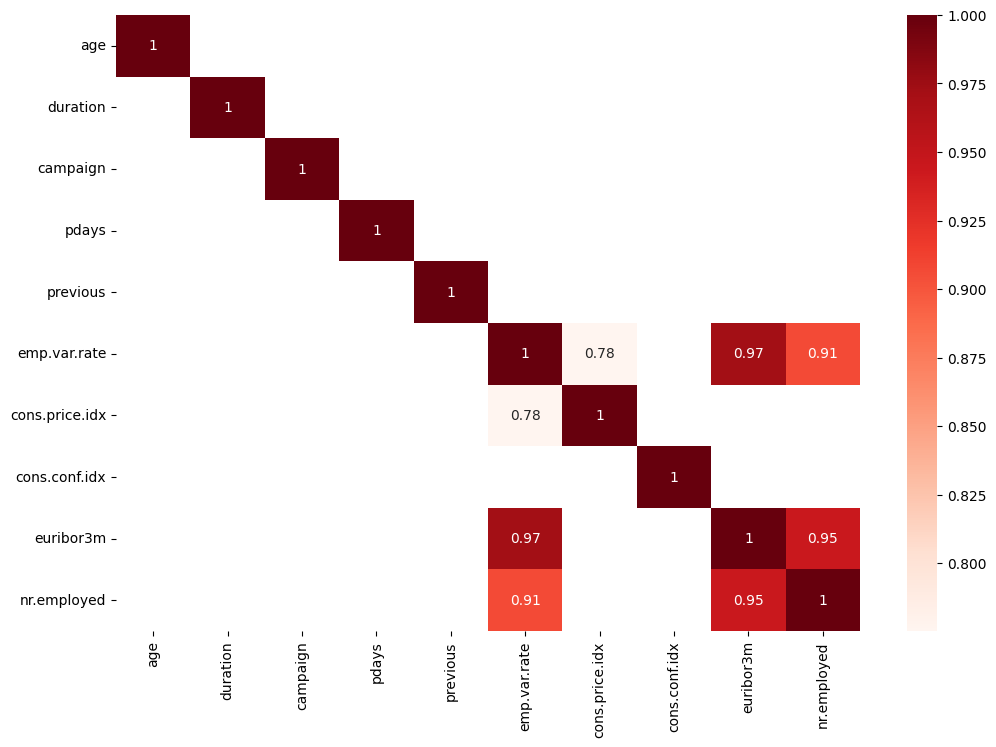

In [ ]:
# Visualize the strong_correlation
plt.figure(figsize=(12,8))
sns.heatmap(strong_correlation, cmap="Reds", annot = True);


The analysis reveals high correlations between "euribor3m" and "emp.var.rate," with a 0.97 relationship between the two. These data will not be removed now, as the focus is on tree models without preprocessing. A correlation = 1 is not significant for predictive analysis, as it reflects a feature set within itself.

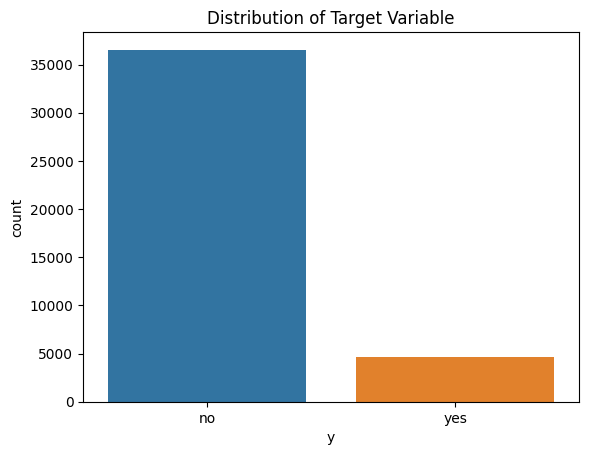

In [ ]:
# Plot the distribution of the target variable
sns.countplot(data=df, x="y")
plt.title("Distribution of Target Variable")
plt.show()


The plot above shows a class imbalance, which we already saw earlier in the raw data.

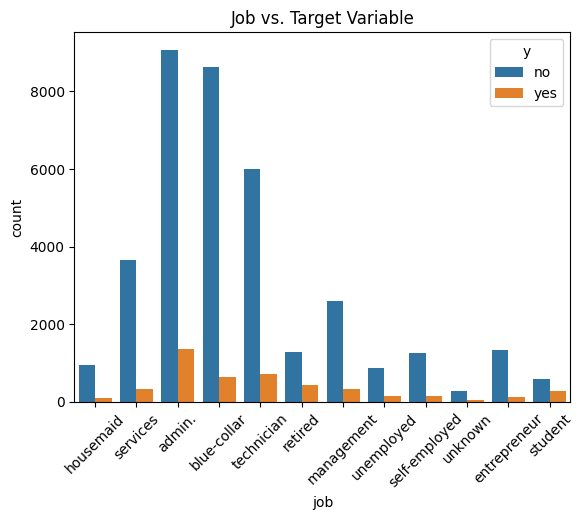

In [ ]:
# Explore relationships between categorical and target variable
sns.countplot(data=df, x="job", hue="y")
plt.title("Job vs. Target Variable")
plt.xticks(rotation=45)
plt.show()


These are just a few examples of EDA on the bank marketing dataset to understand the data. We'll further explore relationships between different features, conduct feature engineering, handle missing values or outliers, and perform other analyses based on our project's objectives and requirements.

### Data preparation functions

In [ ]:
# Utility functions to explore the data and build predictive models
def return_categorical_variables(df):
    """
    This function returns categorical variables in the dataframe.
    """
    categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
    return categorical_columns

def return_numerical_variables(df):
    """
    This function returns numerical variables in the dataframe.
    """
    return list(set(df.columns) - set(return_categorical_variables(df)))


def plot_variable_distributions(df):
    """
    This function plots the distribution of numerical variables in the dataframe.
    """
    fig, axes = plt.subplots(1, len(return_numerical_variables(df)), figsize=(70, 10))

    for i, numeric_column_name in enumerate(list(set(df.columns) - set(return_categorical_variables(df)))):
        sns.distplot(df[numeric_column_name], ax=axes[i])
        plt.title(f'Distribution of {numeric_column_name}')

def evaluate_classifier(clf, x_train, x_test, y_train, y_test):
    """
    This function evaluates a classifier by calculating accuracy, ROC, F-score, precision, and recall.
    """
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)

    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')

    print('Train accuracy:', accuracy_train)
    print('Test accuracy:', accuracy_test)
    print()
    print('Train ROC:', roc_train)
    print('Test ROC:', roc_test)

    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    print()
    print("F-score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)


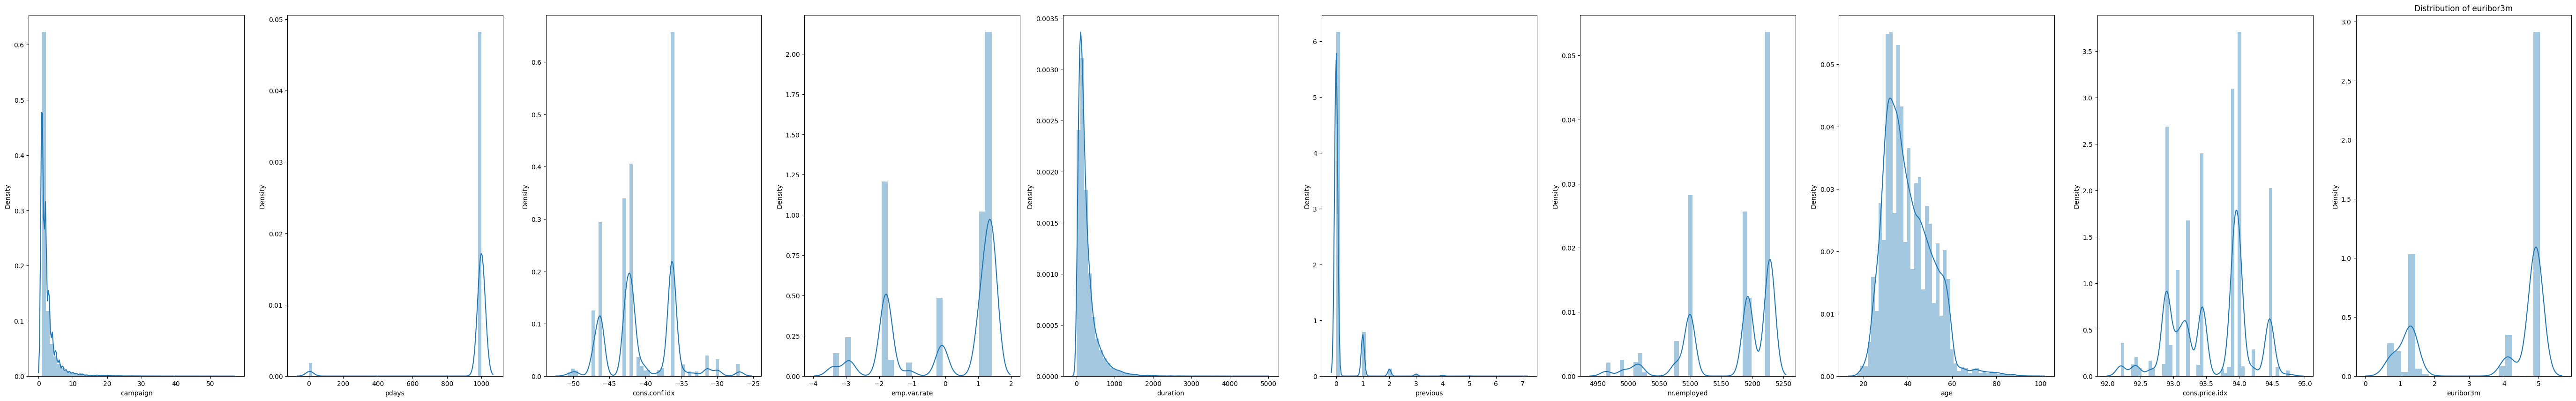

In [ ]:
# Checking the distribution for continuous variables
plot_variable_distributions(df)


* Plots show skewness to the right, indicating outliers or extreme values. Further investigation and analysis are needed to determine cause and impact on statistical tests or models.

## Feature Engineering

Feature engineering involves data pre-processing, data transformation, and feature selection to improve model performance by removing duplicates, handling missing values, scaling, normalizing, and encoding categorical variables.

### View Categorical Features

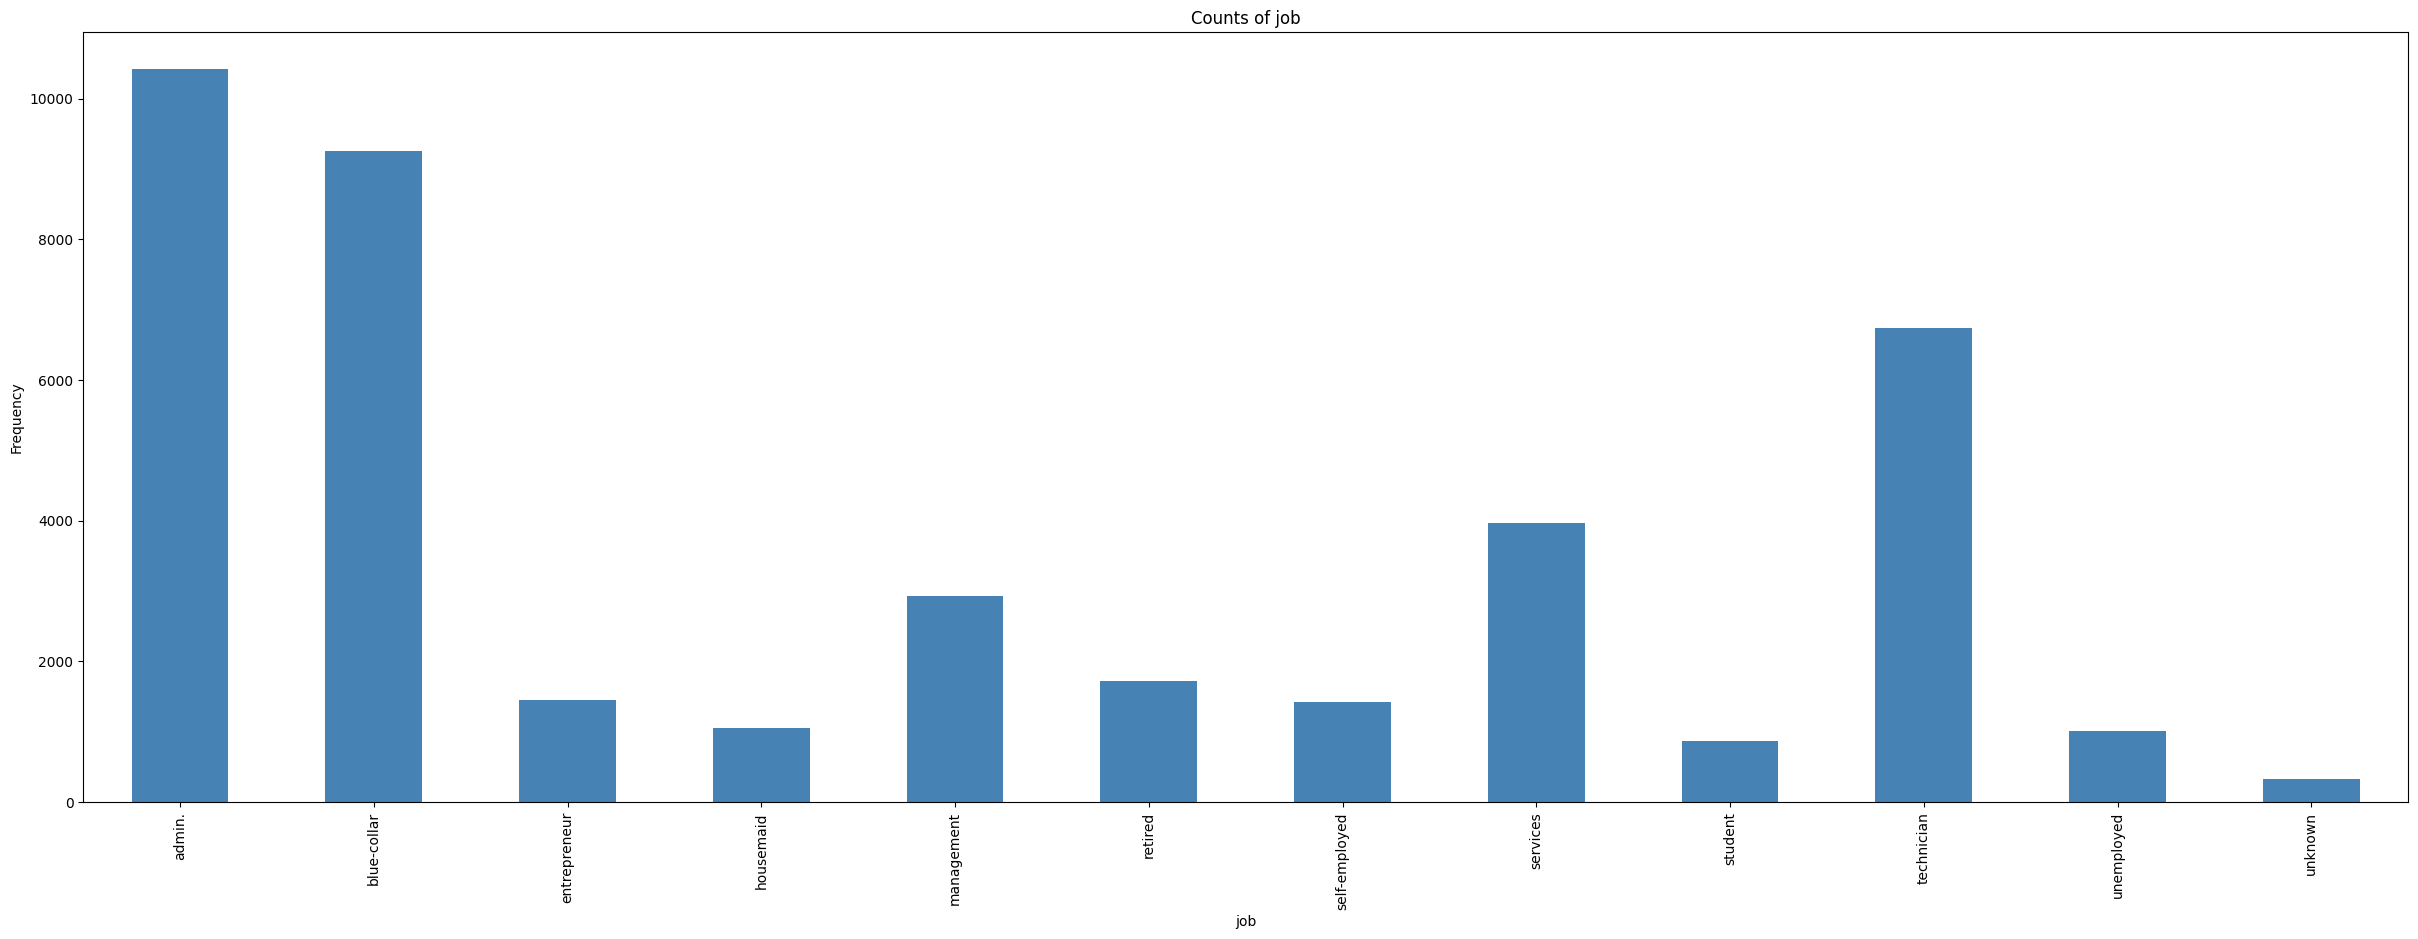

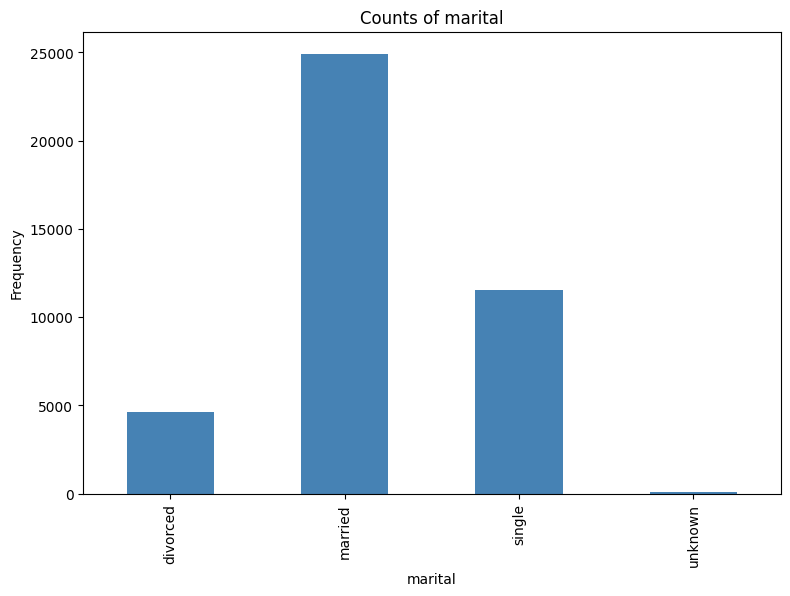

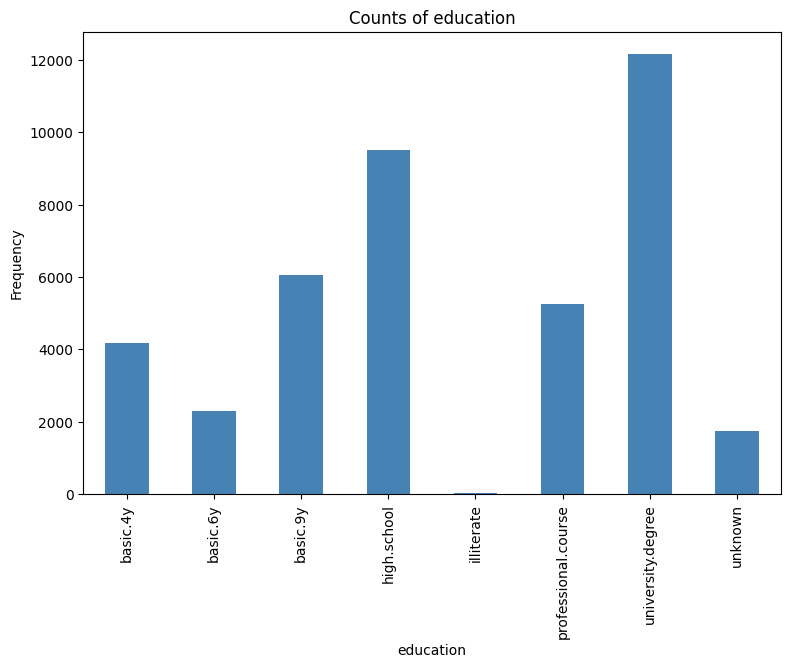

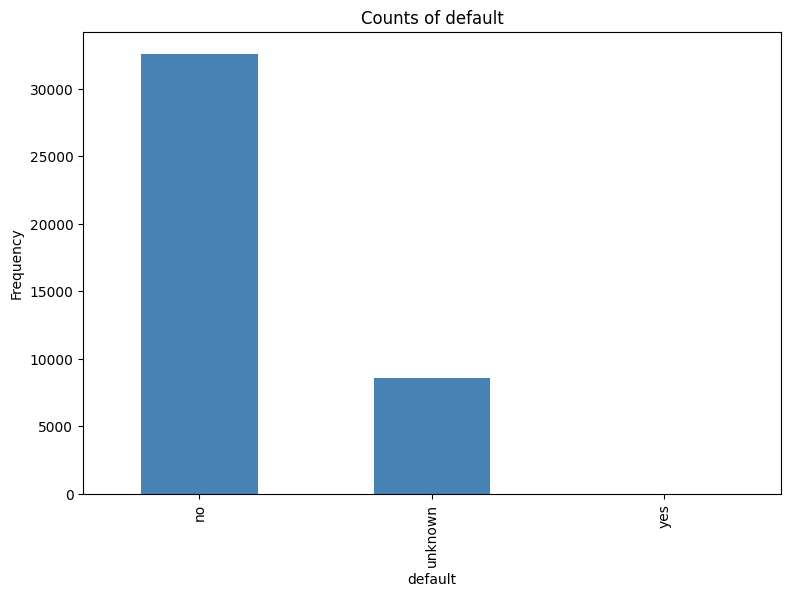

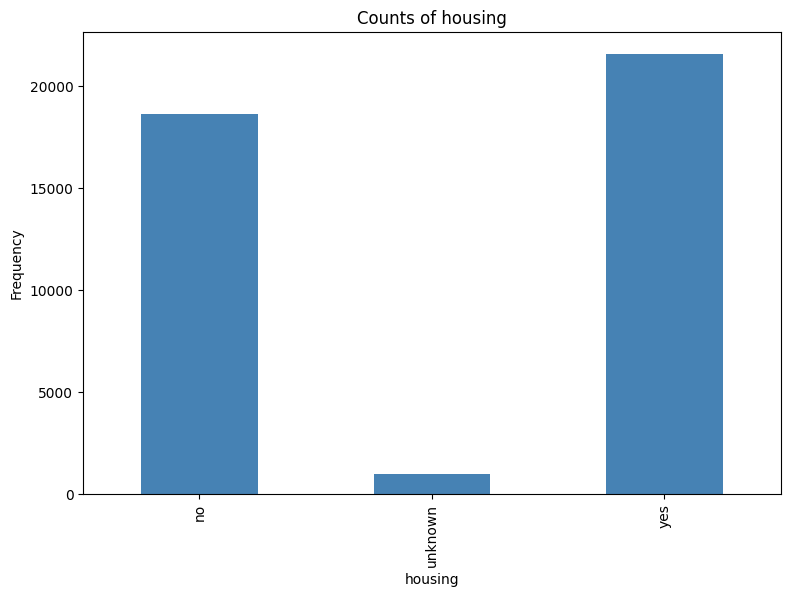

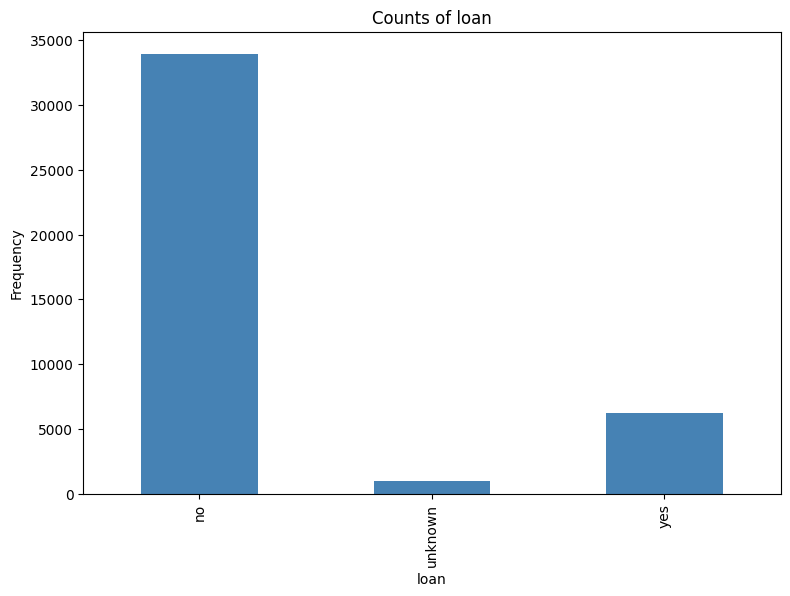

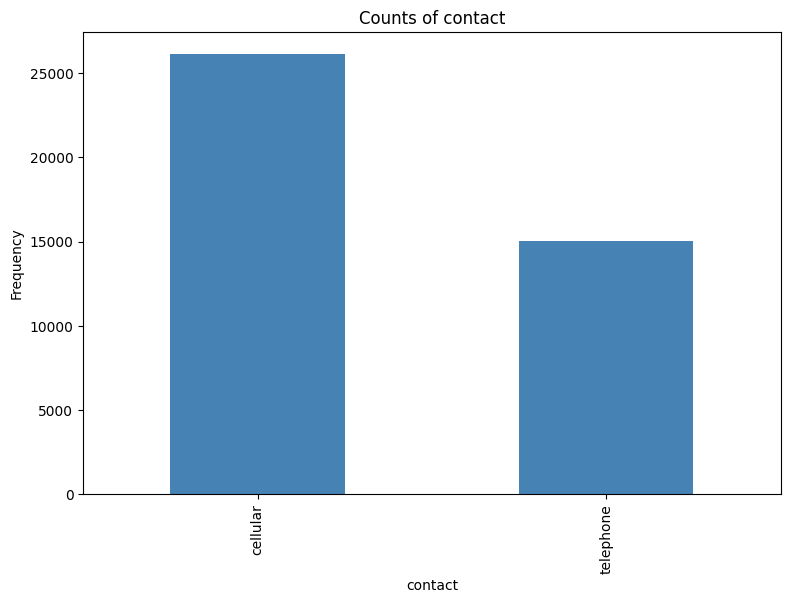

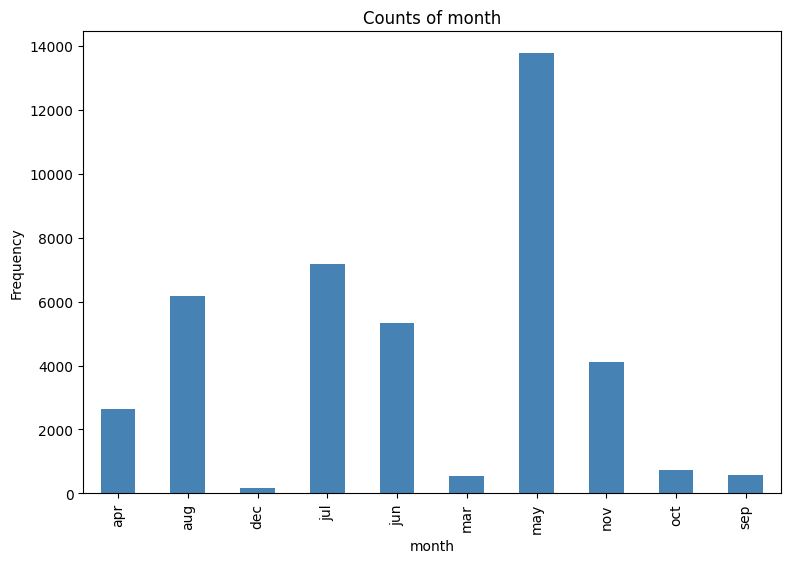

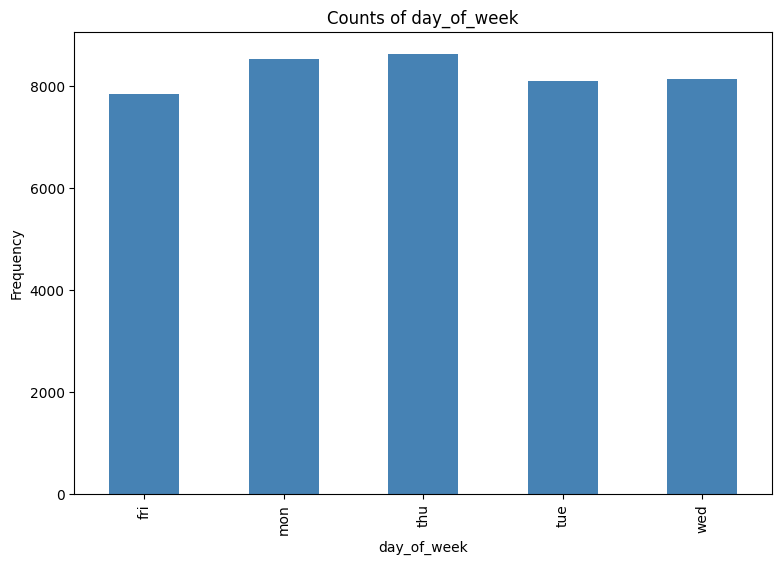

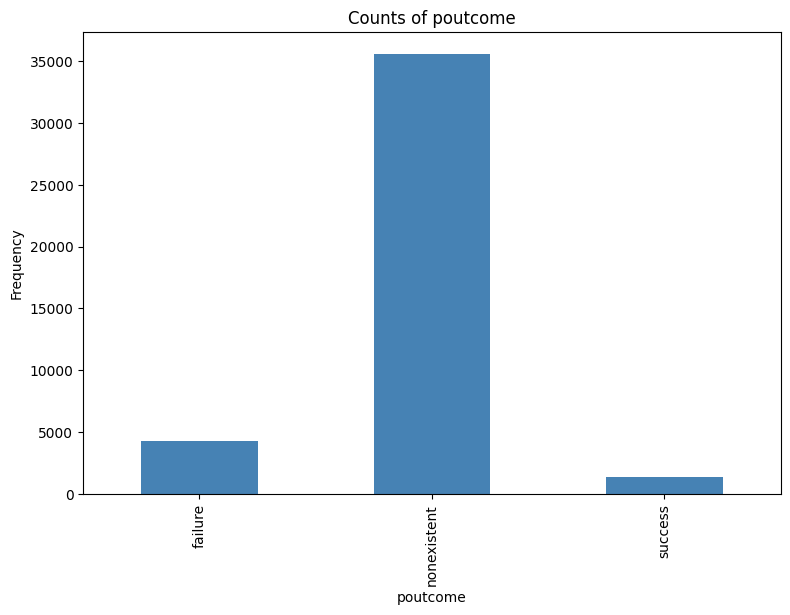

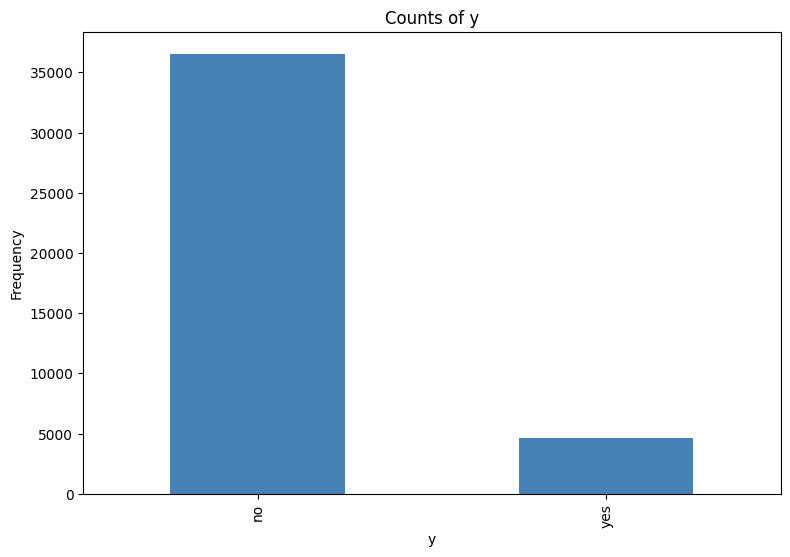

In [ ]:
# Generating graphical representations for each column with discrete values
for column in return_categorical_variables(df):
    value_counts = df[column].value_counts().sort_index()
    if len(value_counts) > 10:
        fig = plt.figure(figsize=(30, 10))
    else:
        fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    value_counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(f"Counts of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
plt.show()


Categorical variables show class imbalances; use the SMOTE method to balance classes, reduce bias, and consider oversampling or ensemble methods for improved predictive model accuracy.

### Feature Selection

Let's check the data distribution in Pdays column. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [ ]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

Now we see that there's an instance of 999, which says that the client was not contacted. We can easily drop the row containing the 999 data, but what we will do instead is assign a lesser weight to 999.

* Similarly, let's give weight to 'job', 'housing', 'loan', 'y', 'default', and 'poutcome' because these variables are also important in predicting the likelihood of loan default. The weight assigned to each variable will depend on its level of significance in the model and its impact on the outcome variable. For instance, job stability and income may have a higher weight than housing or poutcome, as they may have a stronger influence on a borrower's ability to repay their loan.

In [ ]:
# Let's adjust the columns by giving them relevance-based weights
job_weights = {'unknown': -1, 'unemployed': -1, 'entrepreneur': 15, 'blue-collar': 8,
               'technician': 6, 'services': 6, 'admin.': 6, 'management': 6,
               'self-employed': 4, 'student': 4, 'housemaid': 2, 'retired': 2}

housing_mapping = {'no': 0, 'yes': 1}
loan_mapping = {'no': 0, 'yes': 1}
y_mapping = {'no': 0, 'yes': 1}
default_mapping = {'no': 0, 'yes': 1}
poutcome_mapping = {'failure': 0, 'success': 2}

df['job'] = df['job'].map(job_weights)
df['housing'] = df['housing'].map(housing_mapping)
df['loan'] = df['loan'].map(loan_mapping)
df['y'] = df['y'].map(y_mapping)
df['default'] = df['default'].map(default_mapping)
df['poutcome'] = df['poutcome'].map(poutcome_mapping)
df['pdays'] = df['pdays'].apply(lambda x: 0 if x == 999 else (20 if x <= 10 else (6 if x <= 20 else 3)))


* The code assigns weights or mapping values based on importance or specific conditions for each column. Keep in mind that for each 999, the Pday will receive a value of zero.

#### Dropping Columns with Lower Predictive Importance

Based on the provided description of these features, it might be best to discard them.

* Contact: contact communication type (categorical:
'cellular','telephone')
* Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
* Day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')

In [ ]:
# Drop the columns 'day_of_week', 'contact', and 'month' from the DataFrame 'df' using the drop() function.
df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)


In [ ]:
# Encode the remaining attributes using one hot encoding.
df  = pd.get_dummies(df, drop_first = True)


## Using SMOTE to Achieve Data Balance

To use SMOTE, check for missing values and handle them using mean imputation. The code below balances the dataset by oversampling the minority class and compares the resampled shape with the original data.

### Dealing with missing values:

SimpleImputer fills missing values in 'x_train' with mean values, ensuring no missing values during SMOTE resampling.

### Check for Missing Data

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 26 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
poutcome,35563,86.3
default,8597,20.9
housing,990,2.4
loan,990,2.4


From the result, 'poutcome' appears to have a whopping 86.3% of the missing values, while 'default' has 20.9%. The variants 'housing' and 'loan' have fewer missing values. Let's handle the missing values by using the mean method with the simple-imputer function.

In [ ]:
# Split the processed data into separate training and test sets
x = df.drop("y", axis=1)
y = df['y']
x.sample()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [ ]:
# Handle class imbalance using SMOTE
smote = SMOTE()

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on x_train, x_smote, and x_test
x_train_imputed = imputer.fit_transform(x_train)

# Resample using SMOTE on the imputed data
x_smote, y_smote = smote.fit_resample(x_train_imputed, y_train)

# Fit and transform the imputer on x_smote_imputed, and x_test_imputed
x_smote_imputed = imputer.transform(x_smote)
x_test_imputed = imputer.transform(x_test)

print('Original dataset shape:', len(x_train))
print('Resampled dataset shape:', len(x_smote))


Original dataset shape: 30891
Resampled dataset shape: 54808


Observe how the size of our original dataset increased from 30891 to 54808 in the resampled dataset shape due to class imbalance.

In [ ]:
# Scale the numerical features

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the imputed data
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_smote_scaled = scaler.transform(x_smote_imputed)
x_test_scaled = scaler.transform(x_test_imputed)


Three features, x_train_imputed, x_smote_imputed, and x_test_imputed, have been scaled to ensure similar values, improving accuracy and efficiency for machine learning algorithms. Data is now ready for training and testing.

## Modeling

In this section, we'll select, contrast, fine-tune, and analyze our models while taking into account various algorithms and even ensembles.

### KNN Model

Build and evaluate the K-Nearest Neighbors classifier.

In [ ]:
# Perform classification using KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train_scaled, y_train)

# Evaluate the classifier
evaluate_classifier(knn, x_smote_scaled, x_test_scaled, y_smote, y_test)


Train accuracy: 0.65787841191067
Test accuracy: 0.904923764203166

Train ROC: 0.65787841191067
Test ROC: 0.6383644666923141

F-score: 0.40988547317661245
Precision: 0.6719367588932806
Recall: 0.2948829141370338


The KNN model's performance was deemed poor due to a large difference between the training and testing scores. The model's accuracy score of 0.6577 and the test accuracy score of 0.9049 indicate that it may be underfitting, not using all available signals in the data. The model's ROC score of 0.6577 and the test's ROC score of 0.6384 indicate the trade-off between the true positive rate and the false positive rate. The F-score of 0.4099 suggests a moderate balance between precision and recall, but there is room for improvement. The hyperparameters of the model will be tuned to improve performance.

Minimum error:- 0.09391084781975333 at K = 18


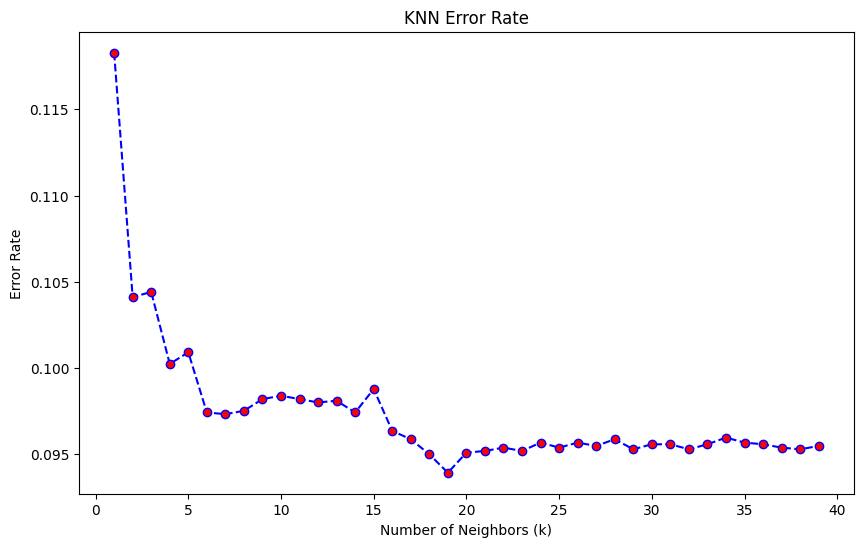

Maximum accuracy:- 0.9060891521802467 at K = 18


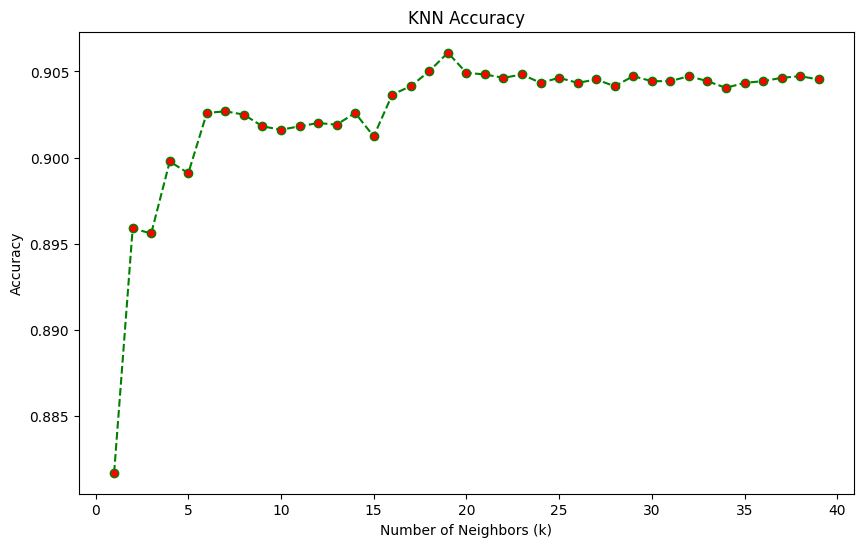

In [ ]:
# Find the best value of k

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the imputed data
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Hyperparameter tuning for KNN
error_rate = []
acc = []

for i in range(1, 40):
    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)

    # Predict on the test set
    pred_i = knn.predict(x_test_scaled)
    yhat = knn.predict(x_test_scaled)

    # Compute error rate and accuracy
    error_rate.append(np.mean(pred_i != y_test))
    acc.append(metrics.accuracy_score(y_test, yhat))

# Plot the error rate and accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('KNN Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), acc, color='green', linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
plt.show()


We have just minimized the error by modeling with different values of K and found K = 18. This new K will help us remodel our data and recalculate the scores.

In [ ]:
# Model with k = 18

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the SMOTE data
x_smote_imputed = imputer.fit_transform(x_smote)
x_test_imputed = imputer.transform(x_test)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the imputed SMOTE data
x_smote_scaled = scaler.fit_transform(x_smote_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Train the KNN classifier on the scaled and imputed SMOTE data
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_smote_scaled, y_smote)

# Evaluate the trained classifier on the scaled and imputed test data
evaluate_classifier(knn, x_smote_scaled, x_test_scaled, y_smote, y_test)


Train accuracy: 0.9113450591154576
Test accuracy: 0.8727784791686899

Train ROC: 0.9113450591154576
Test ROC: 0.8010341806797134

F-score: 0.5550271739130435
Precision: 0.45616973757677276
Recall: 0.7085862966175195


The model training score increased due to reducing k; n_neighbors to 18. The choice of neighbors significantly impacts model accuracy, with too few causing overfitting and too many causing underfitting.

### KNN Bagging Model

Now let's see how the model will perform if we bag with KNN as the base model. Like before, we will first deal with the NaN values using the SimpleImputer before fitting the BaggingClassifier.

*Let's use a KNN Bagging model and see how it performs.*

In [ ]:
# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the SMOTE data
x_smote_imputed = imputer.fit_transform(x_smote)
x_test_imputed = imputer.transform(x_test)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the imputed SMOTE data
x_smote_scaled = scaler.fit_transform(x_smote_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Create a BaggingClassifier with KNN as the base estimator
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=18), n_estimators=15)

# Train the BaggingClassifier on the scaled and imputed SMOTE data
model.fit(x_smote_scaled, y_smote)

# Evaluate the trained classifier on the scaled and imputed test data
evaluate_classifier(model, x_smote_scaled, x_test_scaled, y_smote, y_test)


Train accuracy: 0.9139176762516421
Test accuracy: 0.8699621248907449

Train ROC: 0.9139176762516421
Test ROC: 0.8096806497409852

F-score: 0.5576478361413941
Precision: 0.4503735325506937
Recall: 0.7320034692107545


The ROC scores and accuracy scores for the train and test data show a noticeable difference. Therefore, it may also be worth exploring other machine learning algorithms to see if they can better capture the underlying patterns in the data.

### Decision Tree

*Develop a decision tree classifier to evaluate its performance against KNN. Decision trees are effective for testing machine learning models due to their generalization and clear representation of decision-making processes. However, overfitting can occur if not pruned or regularized. Tune hyperparameters and evaluate them on holdout sets or cross-validation.*

In [ ]:
# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create a DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

# Fit the DecisionTreeClassifier on the imputed training data
dtree.fit(x_train_imputed, y_train)

# Evaluate the trained classifier on the training and test data
evaluate_classifier(dtree, x_train_imputed, x_test_imputed, y_train, y_test)

Train accuracy: 1.0
Test accuracy: 0.8879285228707391

Train ROC: 1.0
Test ROC: 0.7261908149382454

F-score: 0.508517887563884
Precision: 0.499581589958159
Recall: 0.5177797051170858


*The decision Tree may be overfitting the model if the default parameters are used. On the train data, it performed incredibly well but poorly on the test data. Based on the current performance of the decision tree model on the testing data, it appears that tuning the hyperparameters of the decision tree could be a viable solution. Let's try bagging and adjusting the hyperparameters to see how the DT will perform on the unseen data.*

### Decision Tree-Based Bagging

In [ ]:
# Set up KFold cross-validation
kfold = model_selection.KFold(n_splits=3)

# Define the base estimator with tuned hyperparameters
base_estimator = DecisionTreeClassifier(min_samples_split=14, min_samples_leaf=29, max_depth=9, criterion='gini')

# Create the BaggingClassifier with tuned hyperparameters
model = BaggingClassifier(base_estimator=base_estimator, n_estimators=500)

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Fit the model and print the results
evaluate_classifier(model.fit(x_train_imputed, y_train), x_train_imputed, x_test_imputed, y_train, y_test)


Train accuracy: 0.92447638470752
Test accuracy: 0.9200738079052151

Train ROC: 0.7771003979708688
Test ROC: 0.7655124730722623

F-score: 0.6134335368717708
Precision: 0.6690573770491803
Recall: 0.5663486556808326


The results of the decision tree-based bagging model are really good. However, we will redo the modelling process using Random Forest to evaluate its performance.

### Random Forest Model

In [ ]:
# Create the RandomForestClassifier
rforest = RandomForestClassifier(random_state=0)

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Fit the model and print the results
evaluate_classifier(rforest.fit(x_train_imputed, y_train), x_train_imputed, x_test_imputed, y_train, y_test)

Train accuracy: 1.0
Test accuracy: 0.9147324463435952

Train ROC: 1.0
Test ROC: 0.7386298836994899

F-score: 0.5733722060252674
Precision: 0.6519337016574586
Recall: 0.5117085862966175


The current results are not satisfactory, as there is a noticeable disparity between the scores received during training and testing. To enhance the model's performance, it may be beneficial to adjust the hyperparameters of Random Forest.

## Model Hyperparameter Tuning

Build a RandomizedSearchCV and VotingClassifier to optimize and ensemble a machine learning model, identifying optimal hyperparameters and enhancing performance and robustness against overfitting.

### RandomizedSearchCV
'RandomizedSearchCV' is a method for hyperparameter tuning in scikit-learn. It performs a randomized search over a defined parameter grid and selects the best combination of hyperparameters based on a specified scoring metric. It uses cross-validation to evaluate the performance of each parameter combination and returns the best estimator.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', None)  # Classifier will be set dynamically
])

In [ ]:
# Perform hyperparameter tuning for KNN
knn_params = {
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

In [ ]:
# Perform hyperparameter tuning for Random Forest
rf_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

In [ ]:
# Perform hyperparameter tuning for Bagging
bagging_params = {
    'classifier': [BaggingClassifier()],
    'classifier__n_estimators': [10, 20, 30],
    'classifier__max_samples': [0.5, 0.8, 1.0],
    'classifier__max_features': [0.5, 0.8, 1.0]
}

In [ ]:
# Perform hyperparameter tuning for AdaBoost
adaboost_params = {
    'classifier': [AdaBoostClassifier()],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.5, 1.0, 2.0]
}

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_grid = [knn_params, rf_params, bagging_params, adaboost_params]

# Perform cross-validation with hyperparameter tuning
best_clf = None
best_score = 0

for params in param_grid:
    random_search = RandomizedSearchCV(pipeline, params, cv=5, n_iter=10, scoring='accuracy')
    random_search.fit(x_train, y_train)

    score = random_search.score(x_test, y_test)
    if score > best_score:
        best_clf = random_search.best_estimator_
        best_score = score

# Evaluate the best classifier
print("Best Classifier:")
evaluate_classifier(best_clf, x_train, x_test, y_train, y_test)

Best Classifier:
Train accuracy: 0.9740701175099543
Test accuracy: 0.9159949499854326

Train ROC: 0.903165591554125
Test ROC: 0.7454042632138458

F-score: 0.5835339431872895
Precision: 0.6558441558441559
Recall: 0.5255854293148309


Our project's measurement metric, "recall," was not improved by "RandomizedSearchCV" with hyperparameter models. For this reason, the KNN bagging model is still the preferred one because it has the highest recall score.

### VotingClassifier

The VotingClassifier is an ensemble method that combines multiple individual classifiers to make predictions. It aggregates the predictions of the individual classifiers and selects the class label based on a majority vote (in the case of 'hard' voting) or the class probabilities (in the case of 'soft' voting).

In this final calculation, the VotingClassifier is created with three individual classifiers: KNeighborsClassifier, DecisionTreeClassifier, and RandomForestClassifier.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create the VotingClassifier with the individual classifiers
voting_classifier = VotingClassifier(
    estimators=[
        ('KNN', knn),
        ('Decision Tree', dtree),
        ('Random Forest', rforest)
    ],
    voting='hard'  # Use 'hard' voting for majority rule
)

# Fit the ensemble model on the training data
voting_classifier.fit(x_train_scaled, y_train)

# Evaluate the trained classifier on the training and test data
evaluate_classifier(voting_classifier, x_train_scaled, x_test_scaled, y_train, y_test)

Train accuracy: 1.0
Test accuracy: 0.9007477906186268

Train ROC: 1.0
Test ROC: 0.5981161301606597

F-score: 0.3195739014647137
Precision: 0.6876790830945558
Recall: 0.20815264527320035


Due to its low "recall," the same thing can be said about the "voting classifier". KNN bagging still remains the preferred model as long as recall remains the primary evaluation metric. However, in certain scenarios where precision is more important than recall, other models such as decision trees or random forests may be more suitable. It ultimately depends on the specific needs and goals of the project.

## Results and Conclusion

The Bagging with Decision Tree model outperforms in recall and ROC, but recall is preferred for credit insurance modeling because it is more important to correctly identify all the customers who are likely to default on their payments, even if it means having a higher false positive rate. Therefore, the **KNN Bagging model** is recommended for predicting defaults. However, further analysis is needed to identify potential biases or outliers.